In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('MPI_subnational.csv')
data

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387,67.5,57.3
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466,79.3,58.8
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300,59.7,50.3
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301,55.7,54.1
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325,61.0,53.3
...,...,...,...,...,...,...,...,...
979,ZWE,Zimbabwe,Mashonaland West,Sub-Saharan Africa,0.152,0.192,43.7,44.1
980,ZWE,Zimbabwe,Masvingo,Sub-Saharan Africa,0.152,0.174,38.9,44.7
981,ZWE,Zimbabwe,Matabeleland North,Sub-Saharan Africa,0.152,0.238,53.4,44.5
982,ZWE,Zimbabwe,Matabeleland South,Sub-Saharan Africa,0.152,0.164,38.2,42.8


In [2]:
data.head(9)
data.tail(9)


,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
975,ZWE,Zimbabwe,Harare,Sub-Saharan Africa,0.152,0.038,9.6,39.8
976,ZWE,Zimbabwe,Manicaland,Sub-Saharan Africa,0.152,0.168,39.1,42.9
977,ZWE,Zimbabwe,Mashonaland Central,Sub-Saharan Africa,0.152,0.210,48.0,43.8
978,ZWE,Zimbabwe,Mashonaland East,Sub-Saharan Africa,0.152,0.140,33.5,41.9
979,ZWE,Zimbabwe,Mashonaland West,Sub-Saharan Africa,0.152,0.192,43.7,44.1
980,ZWE,Zimbabwe,Masvingo,Sub-Saharan Africa,0.152,0.174,38.9,44.7
981,ZWE,Zimbabwe,Matabeleland North,Sub-Saharan Africa,0.152,0.238,53.4,44.5
982,ZWE,Zimbabwe,Matabeleland South,Sub-Saharan Africa,0.152,0.164,38.2,42.8
983,ZWE,Zimbabwe,Midlands,Sub-Saharan Africa,0.152,0.176,40.5,43.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ISO country code                   984 non-null    object 
 1   Country                            984 non-null    object 
 2   Sub-national region                984 non-null    object 
 3   World region                       984 non-null    object 
 4   MPI National                       984 non-null    float64
 5   MPI Regional                       984 non-null    float64
 6   Headcount Ratio Regional           984 non-null    float64
 7   Intensity of deprivation Regional  983 non-null    float64
dtypes: float64(4), object(4)
memory usage: 61.6+ KB


In [4]:
data.shape

(984, 8)

In [5]:
data.describe()

,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
count,984.000000,984.000000,984.000000,983.000000
mean,0.204107,0.211330,40.184451,47.180977
std,0.160248,0.183621,29.981403,8.047225
min,0.006000,0.000000,0.000000,33.300000
25%,0.066000,0.053000,12.475000,41.400000
50%,0.174000,0.155000,33.950000,45.600000
75%,0.303000,0.341500,66.725000,51.900000
max,0.605000,0.744000,99.000000,75.900000


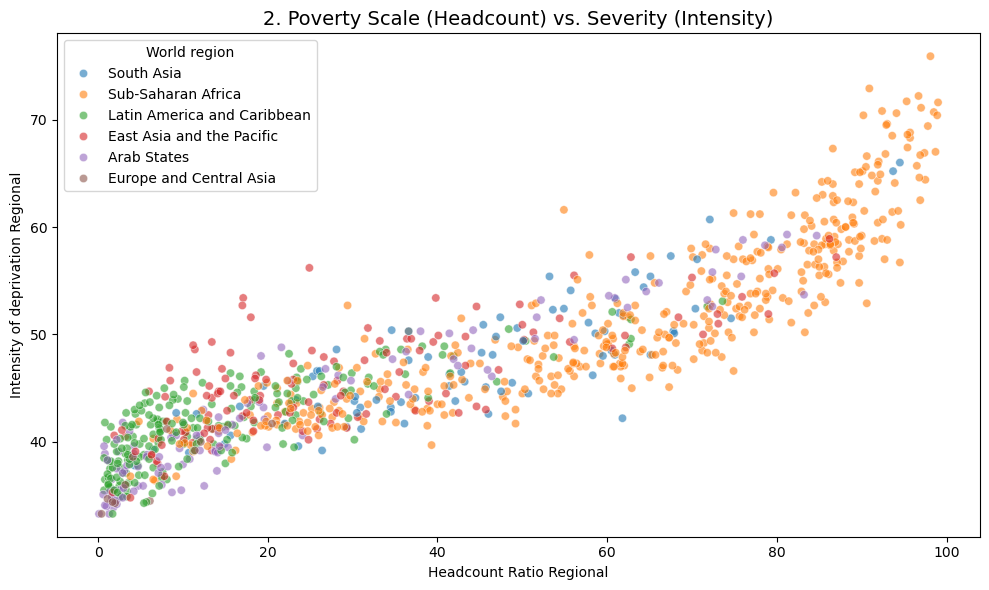

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Headcount Ratio Regional', y='Intensity of deprivation Regional', hue='World region', alpha=0.6, data=data)
plt.title('2. Poverty Scale (Headcount) vs. Severity (Intensity)', fontsize=14)
plt.tight_layout()
plt.savefig('2_scale_vs_severity.png')
plt.show()

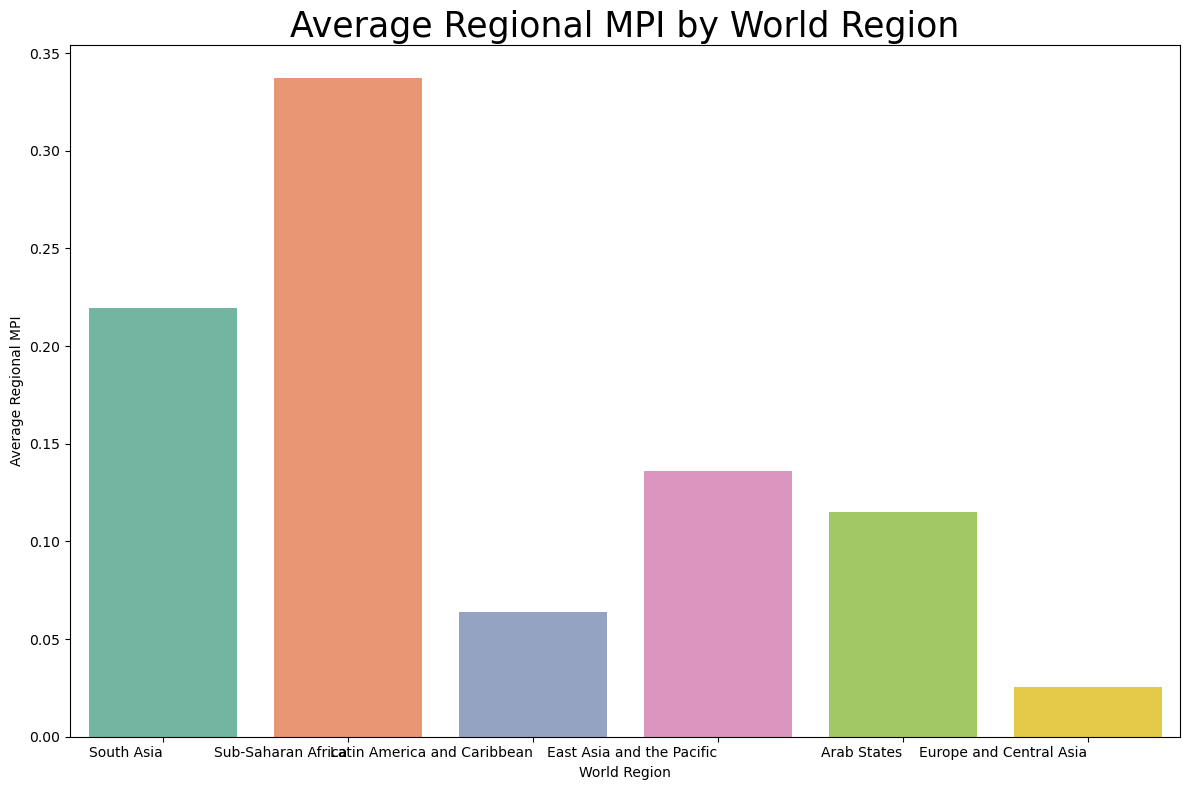

In [7]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=data, 
    x='World region', 
    y='MPI Regional', 
    hue='World region', 
    palette='Set2', 
    legend=False,
    errorbar=None 
)

plt.title('Average Regional MPI by World Region', fontsize=25)
plt.xticks(rotation=0, ha='right') 

plt.ylabel('Average Regional MPI')
plt.xlabel('World Region')
plt.tight_layout()
plt.savefig('1_mpi_bar_chart.png')
plt.show()

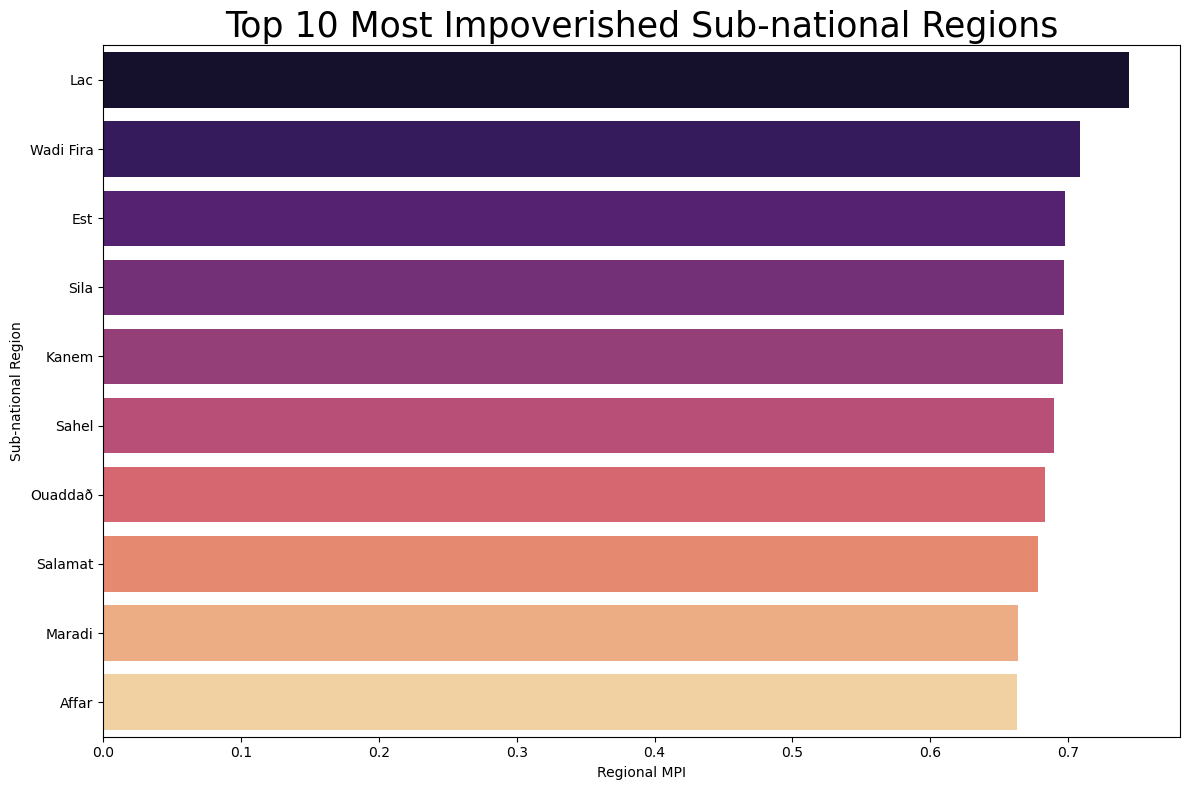

In [8]:
top_10_regions = data.nlargest(10, 'MPI Regional')
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_regions, x='MPI Regional', y='Sub-national region', hue='Sub-national region', palette='magma', legend=False)

plt.title('Top 10 Most Impoverished Sub-national Regions', fontsize=25)
plt.xlabel('Regional MPI')
plt.ylabel('Sub-national Region')
plt.tight_layout()
plt.savefig('3_top_10_regions.png')
plt.show()

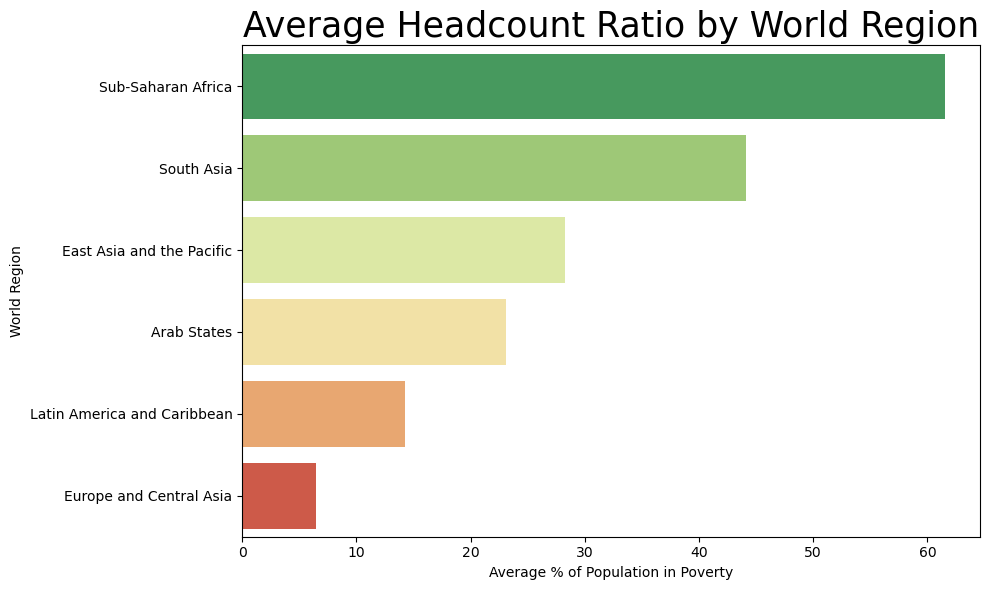

In [9]:
avg_headcount = data.groupby('World region')['Headcount Ratio Regional'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Headcount Ratio Regional', 
    y='World region', 
    data=avg_headcount, 
    hue='World region',
    palette='RdYlGn_r', 
    legend=False
)

plt.title('Average Headcount Ratio by World Region', fontsize=25)
plt.xlabel('Average % of Population in Poverty')
plt.ylabel('World Region')
plt.tight_layout()
plt.savefig('5_avg_headcount_region.png')
plt.show()

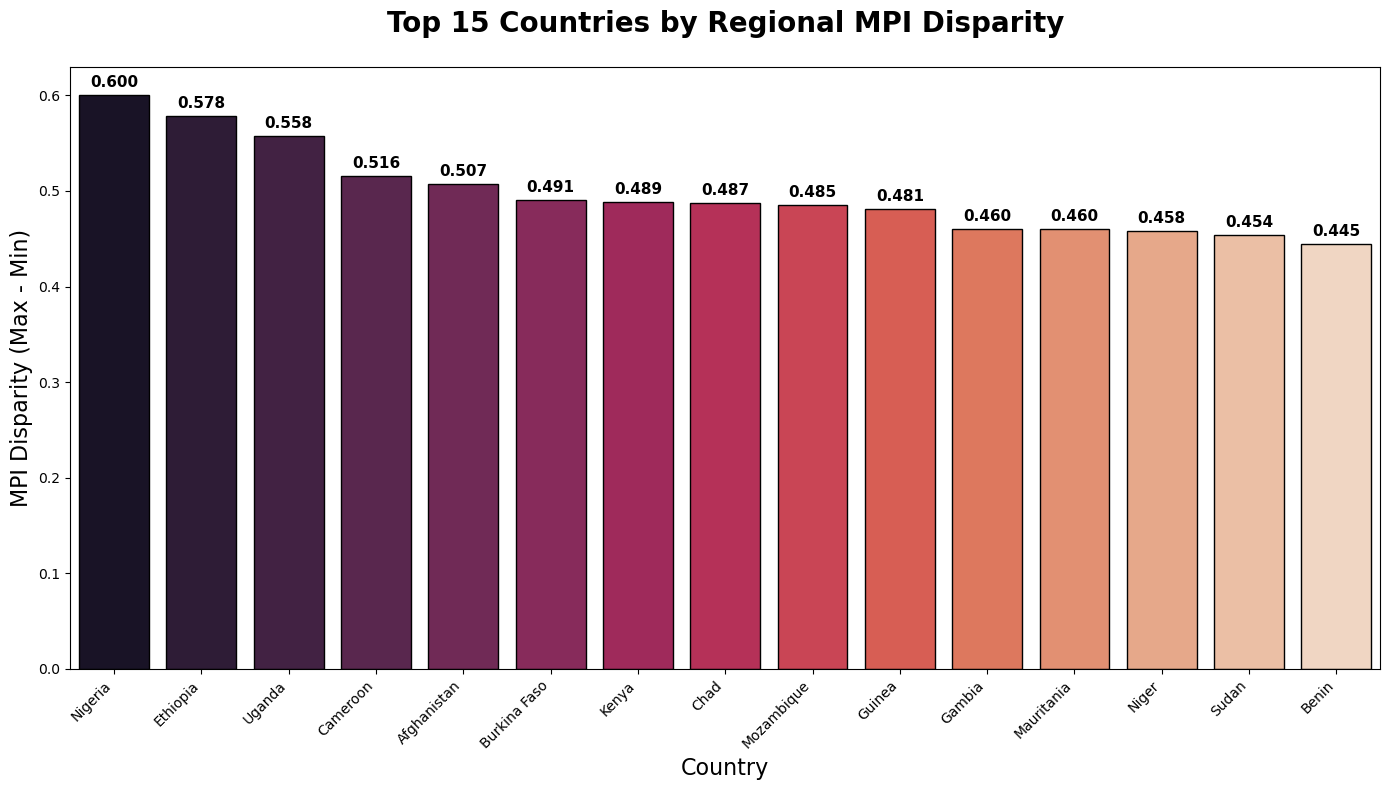

In [10]:
country_disparity = data.groupby('Country')['MPI Regional'].agg(['max', 'min', 'count']).reset_index()
country_disparity = country_disparity[country_disparity['count'] > 1]
country_disparity['Disparity'] = country_disparity['max'] - country_disparity['min']
top_disparity = country_disparity.sort_values(by='Disparity', ascending=False).head(15)
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=top_disparity, 
    x='Country', 
    y='Disparity', 
    palette='rocket', 
    edgecolor='black',
    hue='Country',
    legend=False
)

plt.xticks(rotation=45, ha='right')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=11, fontweight='bold')

plt.title('Top 15 Countries by Regional MPI Disparity', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Country', fontsize=16)
plt.ylabel('MPI Disparity (Max - Min)', fontsize=16)
plt.tight_layout()
plt.savefig('vertical_disparity_bar.png', dpi=300)
plt.show()

# INSIGHTS.


1. The Critical Role of Intensity
Poverty is not just about how many people are poor, but how deeply they are deprived.

Most poor regions experience a "primary concentration" of deprivation intensity between 40% and 45%.

There is a direct correlation where regions with a higher percentage of poor people (Headcount Ratio) also face significantly more severe conditions (Intensity).

* Country's average might seem moderate, specific regions like Lac (MPI 0.75) and Sahel (MPI 0.75) show extreme poverty levels that are far beyond their regional averages.


* Sub-Saharan Africa remains the most affected region, with an average headcount ratio exceeding 50% of the population.

* Afghanistan: Shows high internal variance, with the Urozgan region reaching an MPI of 0.624 and a headcount ratio of 94.5%, compared to the national average of 0.295.


* Burkina Faso: Regions like Est and Sahel have headcount ratios of 96.7% and 97.0% respectively, highlighting areas where almost every individual is multidimensionally poor.

2. Legal & Financial Identity: Providing land documentation for 1.4 billion adults to unlock credit and mortgage opportunities.


3. Targeting Fragility: Resources must be disproportionately concentrated on fragile states and conflict zones in Sub-Saharan Africa.


4. Climate & Infrastructure: Investing in heat-resistant crops and resilient roads is essential to protect poor communities from "climate shocks".